In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [150]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [151]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [152]:
df.shape

(500, 9)

In [153]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [155]:
df.duplicated().sum()

0

In [156]:
df = df.drop(columns='Serial No.')

In [157]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [158]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [159]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [160]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 1)

In [162]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [165]:
X_test_scaled

array([[ 0.46      ,  0.5       ,  0.25      ,  0.375     ,  0.14285714,
         0.5224359 ,  0.        ],
       [ 0.44      ,  0.53571429,  0.5       ,  0.5       ,  0.42857143,
         0.53205128,  1.        ],
       [ 0.98      ,  0.96428571,  1.        ,  0.875     ,  0.71428571,
         0.92948718,  0.        ],
       [ 0.52      ,  0.53571429,  0.25      ,  0.625     ,  0.57142857,
         0.58974359,  1.        ],
       [ 0.7       ,  0.64285714,  0.75      ,  0.875     ,  0.71428571,
         0.69230769,  1.        ],
       [ 0.42      ,  0.32142857,  0.25      ,  0.375     ,  0.57142857,
         0.49358974,  1.        ],
       [ 0.6       ,  0.42857143,  0.5       ,  0.5       ,  0.57142857,
         0.62179487,  1.        ],
       [ 0.74      ,  0.39285714,  0.5       ,  0.75      ,  0.71428571,
         0.48076923,  1.        ],
       [ 0.62      ,  0.67857143,  0.5       ,  0.625     ,  0.71428571,
         0.65064103,  1.        ],
       [ 0.56      ,  0.5   

In [166]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [168]:
model = Sequential()

model.add(Dense(7, activation = 'relu',input_dim=7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [169]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288 (1.12 KB)

 Trainable params: 288 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

In [170]:
 model.compile(loss = "mean_squared_error",optimizer = 'Adam')

In [171]:
history = model.fit(X_train_scaled,y_train,epochs = 150,validation_split=0.2)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.1865 - val_loss: 1.0170
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9278 - val_loss: 0.8125
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7426 - val_loss: 0.6738
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5979 - val_loss: 0.5777
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5148 - val_loss: 0.4984
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4309 - val_loss: 0.4318
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3800 - val_loss: 0.3903
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3388 - val_loss: 0.3543
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3271 - val_loss: 0.3196
Epoch 10/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2692 - val_loss: 0.2859
Epoch 11/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2455 - val_loss: 0.2510
Epoch 12/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [172]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [173]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8088172105127411

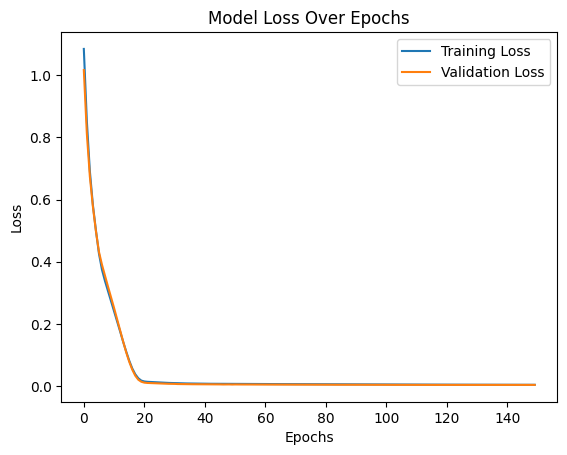

In [174]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()

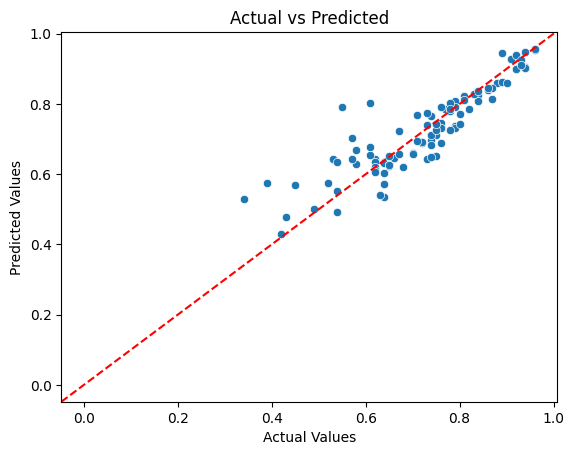

In [177]:
import seaborn as sns
import pandas as pd

df_results = pd.DataFrame({
    'Actual': y_test.to_numpy().flatten(),  # Convert only if y_test is a pandas Series
    'Predicted': y_pred.flatten()  # y_pred is already a NumPy array
})

sns.scatterplot(x='Actual', y='Predicted', data=df_results)
plt.axline((0, 0), slope=1, color='r', linestyle='--')  # Ideal predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()
